## Due date: Wednesday 03/10 at 11:59 pm ##

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Lab 5:  More on Eigenvalues of random sample covariance matrices#


## Part I: Convergence of the expected value of the histogram statistics ##
Simulate a 80 x 20 Gaussian Wishart matrix and collect its eigenvalues. Do that 500 times and collect all the eigenvalues founded. Plot then the histogram of the 500*20 eigenvalues and superimpose the correct Marchenko-Pastur density. You should see a very nice Marchenko-Pastur distribution.

In [2]:
#student   #create a 500*20 array called eig with all the eigenvalues
eig=np.array([])
m=80
N=20
for i in range(500):
    X=np.random.normal(0,1,(m,N))
    C=1/N*(np.dot(np.transpose(X),X))
    eigvals, eigvecs = np.linalg.eig(C)
    eig=np.append(eig,eigvals)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


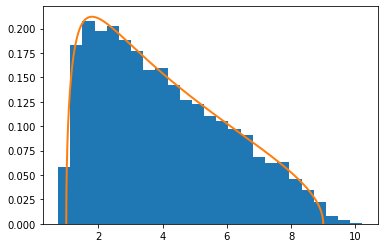

In [6]:
#student #plot the histogram of eig and superimpose the Marchenko-Pastur density
plt.hist(eig,density=True,bins=25)
x = np.arange(0,10,0.001)  #some random value for x axis
y = 1/4*(np.sqrt((x-4*(1-np.sqrt(1/4))**2)*(4*(1+np.sqrt(1/4))**2-x)))/(2*np.pi*x/4) #y=f(x)
h = plt.plot(x, y, lw=2) 
plt.show()

## Part 2: Behaviour of the largest and smallest eigenvalues ##
Let $\rho=m_N/N=2$ fixed. For growing value of N simulate a $m_NxN$ Gaussian Wishart matrix and save its smallest and largest eigenvalues.

In [18]:
#student
Eig=np.array([])
eig=np.array([])
N=np.arange(20,300,10) #this gives you value of N from 20 to 300 with step of 10
m=2*N
for i in range(28):
    X=np.random.normal(0,1,(m[i],N[i]))
    C=1/(N[i])*(np.dot(np.transpose(X),X))
    eigvals, eigvecs = np.linalg.eig(C)
    eig_max=np.amax(eigvals)
    eig_min=np.amin(eigvals)
    Eig=np.append(Eig,eig_max)
    eig=np.append(eig,eig_min)

According to what you have studied in class, which values the largest and the smallest eigenvalues should approach?

#student
largest should approach 3+2root2, smallest should approach -1+2root2

In [6]:
print(3+2*np.sqrt(2))
print(-1+2*np.sqrt(2))

5.82842712474619
1.8284271247461903


Plot now the sequence of largest eigenvalues and smallest ones to verify your answer.

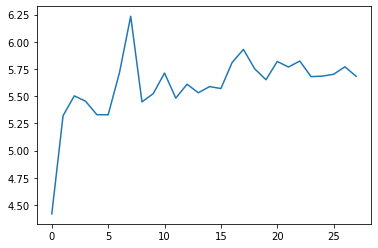

In [20]:
#student  plot the sequence of largest eigenvalues
plt.plot(Eig)

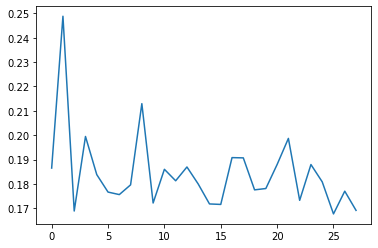

In [21]:
#student  plot the sequence of smallest eigenvalues
plt.plot(eig)

Repeat now the same experiment but with entries of the matrix distributed according to a Uniform in $(-\sqrt{3},\sqrt{3})$. What do you notice?

In [7]:
#student find Eig and eig
Eig=np.array([])
eig=np.array([])
N=np.arange(20,300,10) #this gives you value of N from 20 to 300 with step of 10
m=2*N
for i in range(28):
    X=np.random.uniform(-np.sqrt(3),np.sqrt(3),(m[i],N[i]))
    C=1/(N[i])*(np.dot(np.transpose(X),X))
    eigvals, eigvecs = np.linalg.eig(C)
    eig_max=np.amax(eigvals)
    eig_min=np.amin(eigvals)
    Eig=np.append(Eig,eig_max)
    eig=np.append(eig,eig_min)

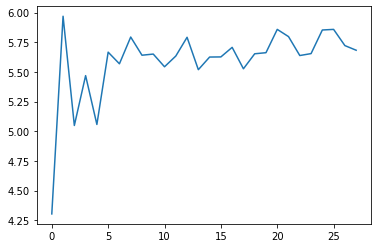

In [8]:
#student plot the sequence of Eig
plt.plot(Eig)

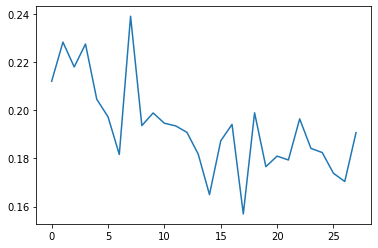

In [9]:
#student plot the sequence of eig
plt.plot(eig)

#student #what do you notice?
The range is similar to the range of N(0,1), converges to exact numbers.

Let's try now with another distribution. Let's consider the following density:$$f(x)=4*x^{-5}\;\;\;if\;\;\;x\geq1$$
Compute the second moment and the fourth moment of this distribution. What do you notice?

#student second moment is 2, fourth moment is infinity

Repeat now the same experiment as before. What do you expect to observe?

#student
expect to not converge. Since fourth moment is infinity.

To simulate data from any distribution, you can use its CDF. In this case
$$F(x)=1-x^{-4} \;\;\; if\;\;\; x\geq1$$
These are the steps you need to perform:

1- Simulate $U$ from $U(0,1)$

2- $X=F^{-1}(U)$

Since in this case we would like to have data with mean zero and variance equal to 1, we can then standardize them:

3- $\tilde{X}=\frac{X-mean(X)}{sd(X)}$

Complete the code below to find Eig and eig.

In [10]:
#student
def uniform_to_ourdistribution(u):  #inverse of CDF
    return ((1-u))**4

Eig=np.array([])
eig=np.array([])
N=np.arange(20,300,10) #this gives you value of N from 20 to 300 with step of 10
m=2*N
for i in range(28):
    U = stats.uniform.rvs(0, 1, (m[i],N[i])) #simulate uniform
    X= uniform_to_ourdistribution(U) #apply transformation to simulate under out distribution
    X=(X-np.mean(X))/np.sqrt(np.var(X))  #standardize the data
    C=1/(N[i])*(np.dot(np.transpose(X),X))
    eigvals, eigvecs = np.linalg.eig(C)
    eig_max=np.amax(eigvals)
    eig_min=np.amin(eigvals)
    Eig=np.append(Eig,eig_max)
    eig=np.append(eig,eig_min)


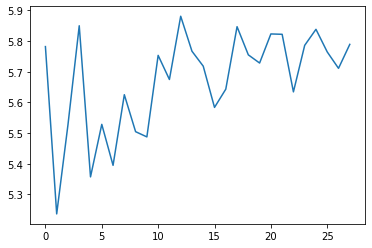

In [11]:
#student
plt.plot(Eig)

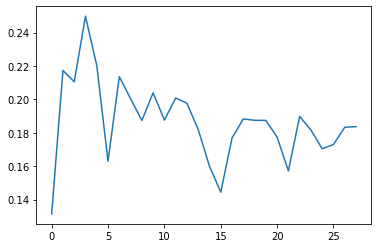

In [12]:
#student
plt.plot(eig)